In [1]:
# Step - 1: Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm

In [2]:
# Step - 2: Loading Dataset

df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Step - 3: Getting Comfortable with Dataset

df.rename(columns={'YearsExperience': 'Experience'}, inplace=True)
print(df.head())

   Experience   Salary
0         1.1  39343.0
1         1.3  46205.0
2         1.5  37731.0
3         2.0  43525.0
4         2.2  39891.0


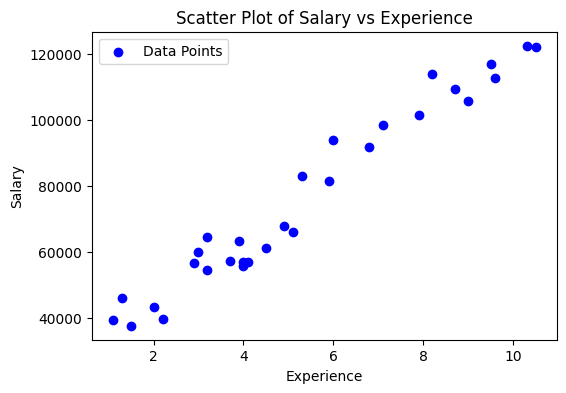

In [4]:
# Step - 4: Plotting the Scatter Plot

plt.figure(figsize=(6,4))
plt.scatter(df["Experience"], df["Salary"], color='blue', label="Data Points")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title("Scatter Plot of Salary vs Experience")
plt.legend()
plt.show()

In [5]:
# Step - 5: Checking Correlation

print(df.corr())
# sns.pairplot(df)      # Not Necessary Here
# plt.show()

            Experience    Salary
Experience    1.000000  0.978242
Salary        0.978242  1.000000


### Define Independent & Dependent Variables

In [6]:
# Step - 6: Defining Independent and Dependent Event

X = df[['Experience']]       # Independent variable (2D)
Y = df['Salary']             # Dependent variable (1D)

In [7]:
# Step - 7: Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (22, 1)
Test Shape: (8, 1)


In [8]:
# Step - 7.1: Apply Standard Scaler (Optional)
# Prefer not to use when the dataset is too small

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [9]:
# Step - 8: Training Linear Regression Model

regression = LinearRegression()
regression.fit(X_train, Y_train)

print("Coefficient (Slope):", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient (Slope): [9371.0160797]
Intercept: 25478.12743600038


In [10]:
# Step - 9: Setting Up the Pipeline and Cross Validation (Optional)

# Pipeline([
#     ("scaler", StandardScaler()),
#     ("lr", LinearRegression())
# ])

# CV skipped due to very small dataset (n=30); results may be unstable
# cv_scores = cross_val_score(Pipeline, X, Y, cv=5, scoring="r2")

# print(cv_scores)
# print("Mean:", cv_scores.mean())
# print("Std:", cv_scores.std())

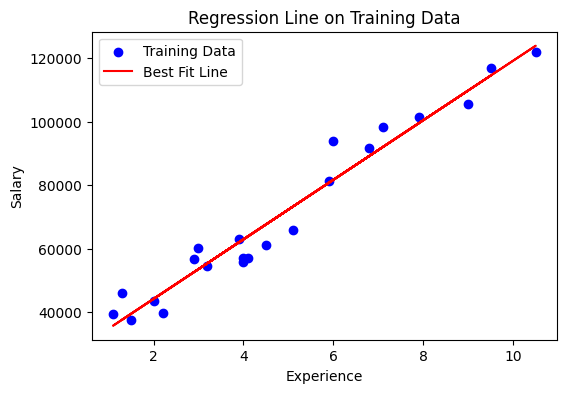

In [11]:
# Step - 10: Plotting Best Fit Line

plt.figure(figsize=(6,4))
plt.scatter(X_train, Y_train, color='blue', label="Training Data")
plt.plot(X_train, regression.predict(X_train), color='red', label="Best Fit Line")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Regression Line on Training Data")
plt.legend()
plt.show()

In [12]:
# Step - 11: Predicting X_test

Y_pred = regression.predict(X_test)

In [13]:
# Step - 12: Comparing Actual vs Predicted Output

results = pd.DataFrame({
    "Actual Salary": Y_test.values,
    "Predicted Salary": Y_pred
})
print("\nComparison of Actual vs Predicted (first 10 rows):")
print(results.head(10))


Comparison of Actual vs Predicted (first 10 rows):
   Actual Salary  Predicted Salary
0       112635.0     115439.881801
1        67938.0      71396.106227
2       113812.0     102320.459290
3        83088.0      75144.512658
4        64445.0      55465.378891
5        57189.0      60150.886931
6       122391.0     121999.593057
7       109431.0     107005.967329


In [14]:
# Step - 13: Performance Metrics

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 38802588.99247065
MAE: 5056.995466663592
RMSE: 6229.172416338358
R2 Score: 0.9347210011126782


In [15]:
# Step - 14: Checking Underfitting & Overfitting

# Predictions on training data
Y_train_pred = regression.predict(X_train)

# Training metrics
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

print("TRAIN RMSE:", train_rmse)
print("TRAIN R2:", train_r2)

print("TEST RMSE:", rmse)
print("TEST R2:", r2)

TRAIN RMSE: 5415.910565298476
TRAIN R2: 0.9553880313075513
TEST RMSE: 6229.172416338358
TEST R2: 0.9347210011126782


### OLS Regression

In [16]:
# Step - 15: OLS Regression

X_train_ols = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     428.3
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           5.62e-15
Time:                        18:20:16   Log-Likelihood:                -220.35
No. Observations:                  22   AIC:                             444.7
Df Residuals:                      20   BIC:                             446.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.548e+04   2486.268     10.248      0.0

## 📊 **Result and Interpretation**

A simple linear regression model was built to analyze the relationship between **Years of Experience** and **Salary**.

### 🔹 **Correlation Analysis**

* The correlation coefficient between Experience and Salary is **0.978**, indicating a **very strong positive linear relationship**.
* This suggests that salary increases significantly with years of experience.

---

### 🔹 **Linear Regression Model**

The fitted regression equation is:

[
\text{Salary} = 25478.13 + 9371.02 \times (\text{Experience})
]

**Interpretation:**

* **Intercept (25,478.13):**
  Represents the estimated salary when experience is zero.
* **Slope (9,371.02):**
  For every additional year of experience, salary increases by approximately **₹9,371**.

---

### 🔹 **Model Performance (Test Data)**

| Metric   | Value         |
| -------- | ------------- |
| MAE      | 5,056.99      |
| MSE      | 38,802,588.99 |
| RMSE     | 6,229.17      |
| R² Score | **0.9347**    |

**Explanation:**

* The **R² score of 93.47%** indicates that the model explains most of the variance in salary.
* Low MAE and RMSE values suggest **good prediction accuracy**.

---

### 🔹 **Underfitting / Overfitting Check**

| Dataset  | RMSE     | R²     |
| -------- | -------- | ------ |
| Training | 5,415.91 | 0.9554 |
| Testing  | 6,229.17 | 0.9347 |

* Training and testing metrics are **very close**, indicating that the model **generalizes well**.
* There is **no evidence of overfitting or underfitting**.

---

### 🔹 **OLS Regression Analysis**

* **R²:** 0.955
* **Adjusted R²:** 0.953
* **p-value (Experience): < 0.001**

**Inference:**

* The predictor **Experience is statistically significant**.
* The confidence interval for the coefficient does not include zero, confirming a strong linear effect.
* Residual diagnostics (Omnibus, Jarque-Bera) indicate **normal distribution of errors**.

---

## ✅ **Conclusion**

The linear regression model effectively captures the relationship between experience and salary. With high explanatory power, statistically significant coefficients, and consistent performance across training and testing datasets, the model is **reliable and well-fitted** for predicting salary based on years of experience.

---